#                                          SENTIMENT ANALYSIS

# Importing Important Libraries

In [10]:
import os
import tweepy as tw
import pandas as pd

# API Keys

In [11]:
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''

# API Keys Authentication

In [12]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [13]:
# Define the search term and the date_since date as variables
search_words = "#moratorium"
date_since = "2020-01-01"

# Collecting Tweets

In [14]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(1000)
#items(5) will return 5 of the most recent tweets.
tweets

In [15]:
for tweet in tweets:
    print(tweet.text)

@INCIndia Very good. Also Fight for middle class people too. #moratorium
RT @NarendraShinga8: Profits of moratorium
1. High blood pressure
2. Tension 
3. Mental depression
All of these credit gose to government a…
RT @NishantGulati18: #moratorium3
Please extend #moratorium3 we can't pay the #EMIs 
#moratorium
@RBI @FinMinIndia @PMOIndia @nsitharaman @…
RT @BRATINROY6: @purohit_b @PMOIndia @indSupremeCourt @RBI @PMOIndia  #moratorium 3  We want direct moratorium otherwise financial companie…
RT @Adithyak8977: This is what you want right? @RBI @PMOIndia @nsitharaman @DasShaktikanta  #WeWantMoratorium #moratorium3 #moratoriumforal…
RT @NishantGulati18: #moratorium3
Please extend #moratorium3 we can't pay the #EMIs 
#moratorium
@RBI @FinMinIndia @PMOIndia @nsitharaman @…
#moratorium #ExtendMoratorium 
@RBI @nsitharaman @ianuragthakur 
Please extend the moratorium because.
School was n… https://t.co/nueUYKTRzL
RT @NarendraShinga8: Profits of moratorium
1. High blood pressure
2. Tension 
3. 

# Removing Retweets from the tweets

In [16]:
new_search = search_words + " -filter:retweets"
new_search

# '#moratorium -filter:retweets'

'#moratorium -filter:retweets'

In [17]:
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(1000)

[tweet.text for tweet in tweets]

['@INCIndia Very good. Also Fight for middle class people too. #moratorium',
 '#moratorium #ExtendMoratorium \n@RBI @nsitharaman @ianuragthakur \nPlease extend the moratorium because.\nSchool was n… https://t.co/nueUYKTRzL',
 '@purohit_b @PMOIndia @indSupremeCourt @RBI @PMOIndia  #moratorium 3  We want direct moratorium otherwise financial… https://t.co/R6Nz0IymbT',
 'Now I am declaring loud &amp; clear tat ll nt pay ny single EMI so do whatever u want. I ll nt pay &amp; ll urge every1 nt… https://t.co/dL4NRaXCHW',
 "#moratorium3\nPlease extend #moratorium3 we can't pay the #EMIs \n#moratorium\n@RBI @FinMinIndia @PMOIndia… https://t.co/yHF4e5BHQ0",
 '@SetuSagar @CNBCTV18Live @Sapna_CNBC @ShereenBhan @latha_venkatesh Money will come this way, hike petrol &amp; diesel p… https://t.co/185zvvgcxS',
 '@kirti_09dh @PMOIndia @nsitharamanoffc @consumerforum_ @narendramodi @RSSorg @BJP4India if #moratorium on Home Loan… https://t.co/e831sUZab0',
 'Systemically large Org. like @SBICard_Connect #

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [19]:
search_term = "#moratorium -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-01-01').items(1000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

['@INCIndia Very good. Also Fight for middle class people too. #moratorium',
 '#moratorium #ExtendMoratorium \n@RBI @nsitharaman @ianuragthakur \nPlease extend the moratorium because.\nSchool was n… https://t.co/nueUYKTRzL',
 '@purohit_b @PMOIndia @indSupremeCourt @RBI @PMOIndia  #moratorium 3  We want direct moratorium otherwise financial… https://t.co/R6Nz0IymbT',
 'Now I am declaring loud &amp; clear tat ll nt pay ny single EMI so do whatever u want. I ll nt pay &amp; ll urge every1 nt… https://t.co/dL4NRaXCHW',
 "#moratorium3\nPlease extend #moratorium3 we can't pay the #EMIs \n#moratorium\n@RBI @FinMinIndia @PMOIndia… https://t.co/yHF4e5BHQ0"]

# Creating Function to remove URLs from the tweets

In [20]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

# Removing URLs

In [21]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['INCIndia Very good Also Fight for middle class people too moratorium',
 'moratorium ExtendMoratorium RBI nsitharaman ianuragthakur Please extend the moratorium becauseSchool was n',
 'purohitb PMOIndia indSupremeCourt RBI PMOIndia moratorium 3 We want direct moratorium otherwise financial',
 'Now I am declaring loud amp clear tat ll nt pay ny single EMI so do whatever u want I ll nt pay amp ll urge every1 nt',
 'moratorium3Please extend moratorium3 we cant pay the EMIs moratoriumRBI FinMinIndia PMOIndia']

# Creating a list of lower case words of each tweet

In [22]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['incindia',
  'very',
  'good',
  'also',
  'fight',
  'for',
  'middle',
  'class',
  'people',
  'too',
  'moratorium'],
 ['moratorium',
  'extendmoratorium',
  'rbi',
  'nsitharaman',
  'ianuragthakur',
  'please',
  'extend',
  'the',
  'moratorium',
  'becauseschool',
  'was',
  'n']]

# Calculating and Plotting Word frequency

In [23]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('moratorium', 402),
 ('the', 270),
 ('to', 239),
 ('on', 189),
 ('of', 178),
 ('interest', 176),
 ('and', 159),
 ('is', 136),
 ('in', 136),
 ('for', 115),
 ('are', 106),
 ('extend', 100),
 ('rbi', 82),
 ('people', 81),
 ('a', 81)]

# Creating a Pandas Dataframe for analysis and plotting most common top 15 words

In [24]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,moratorium,402
1,the,270
2,to,239
3,on,189
4,of,178


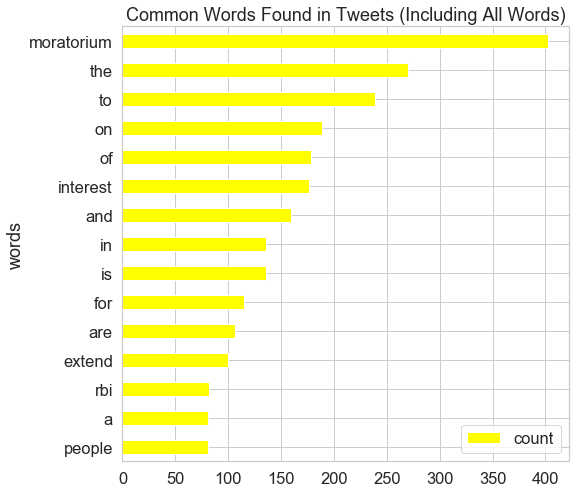

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="yellow")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

# Removing Stop Words and plotting the word frequency graph

In [115]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

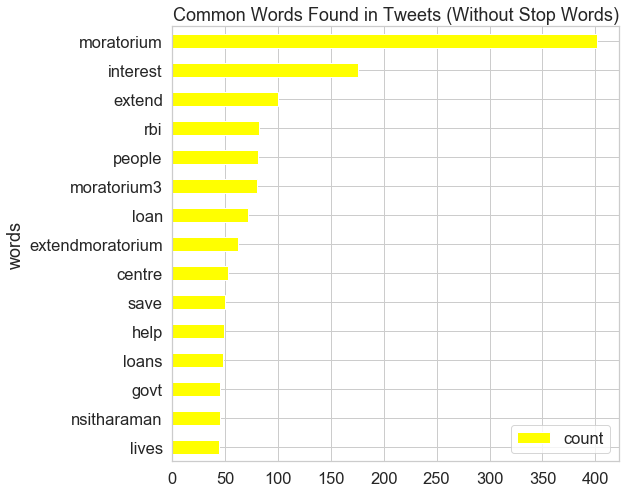

In [26]:
stop_words = set(stopwords.words('english'))
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="yellow")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

# Removing Collection Words

In [27]:
collection_words = ['moratorium']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [53]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('interest', 176),
 ('extend', 100),
 ('rbi', 82),
 ('people', 81),
 ('moratorium3', 80),
 ('loan', 72),
 ('extendmoratorium', 62),
 ('centre', 53),
 ('save', 50),
 ('help', 49),
 ('loans', 48),
 ('nsitharaman', 45),
 ('govt', 45),
 ('lives', 44),
 ('please', 42)]

# Joining all tweets for wordcloud

In [57]:
wordcloud_tweets = ' '.join(counts_nsw_nc)
wordcloud_tweets

'incindia good also fight middle class people extendmoratorium rbi nsitharaman ianuragthakur please extend becauseschool n purohitb pmoindia indsupremecourt 3 want direct otherwise financial declaring loud amp clear tat nt pay ny single emi whatever u urge every1 moratorium3please moratorium3 cant emis moratoriumrbi finminindia setusagar cnbctv18live sapnacnbc shereenbhan lathavenkatesh money come way hike petrol diesel p kirti09dh nsitharamanoffc consumerforum narendramodi rssorg bjp4india home loan systemically large org like sbicardconnect sbicard much larger responsibility towards nation f gov judicial supporter love fact got lovely oppose inspite wewentmoratorium amitshah rashtrapatibhvn vikramreetwal dearpm sir govt judiciary r takes support common man isnt complied government 25 thousand crore rupees build new parliament building given cla chinese day apps national threat must watch video ps use handsfree operating illegally destrying reputation privacy life app supremecourtfan 

Total Number of Unique Words

In [58]:
len(counts_nsw_nc)

2106

# Plotting Words excluding stopwords (also collection words) and plotting the word frequency bargraph

In [59]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15), columns = ['words','count'])
clean_tweets_ncw

,words,count
0,interest,176
1,extend,100
2,rbi,82
3,people,81
4,moratorium3,80
5,loan,72
6,extendmoratorium,62
7,centre,53
8,save,50
9,help,49


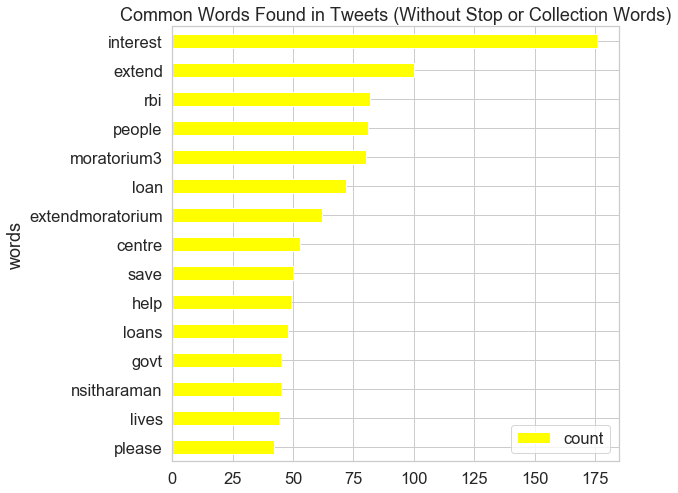

In [60]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="yellow")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

# Importing Important library for wordcloud and defining a function to generate wordcloud

In [46]:
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

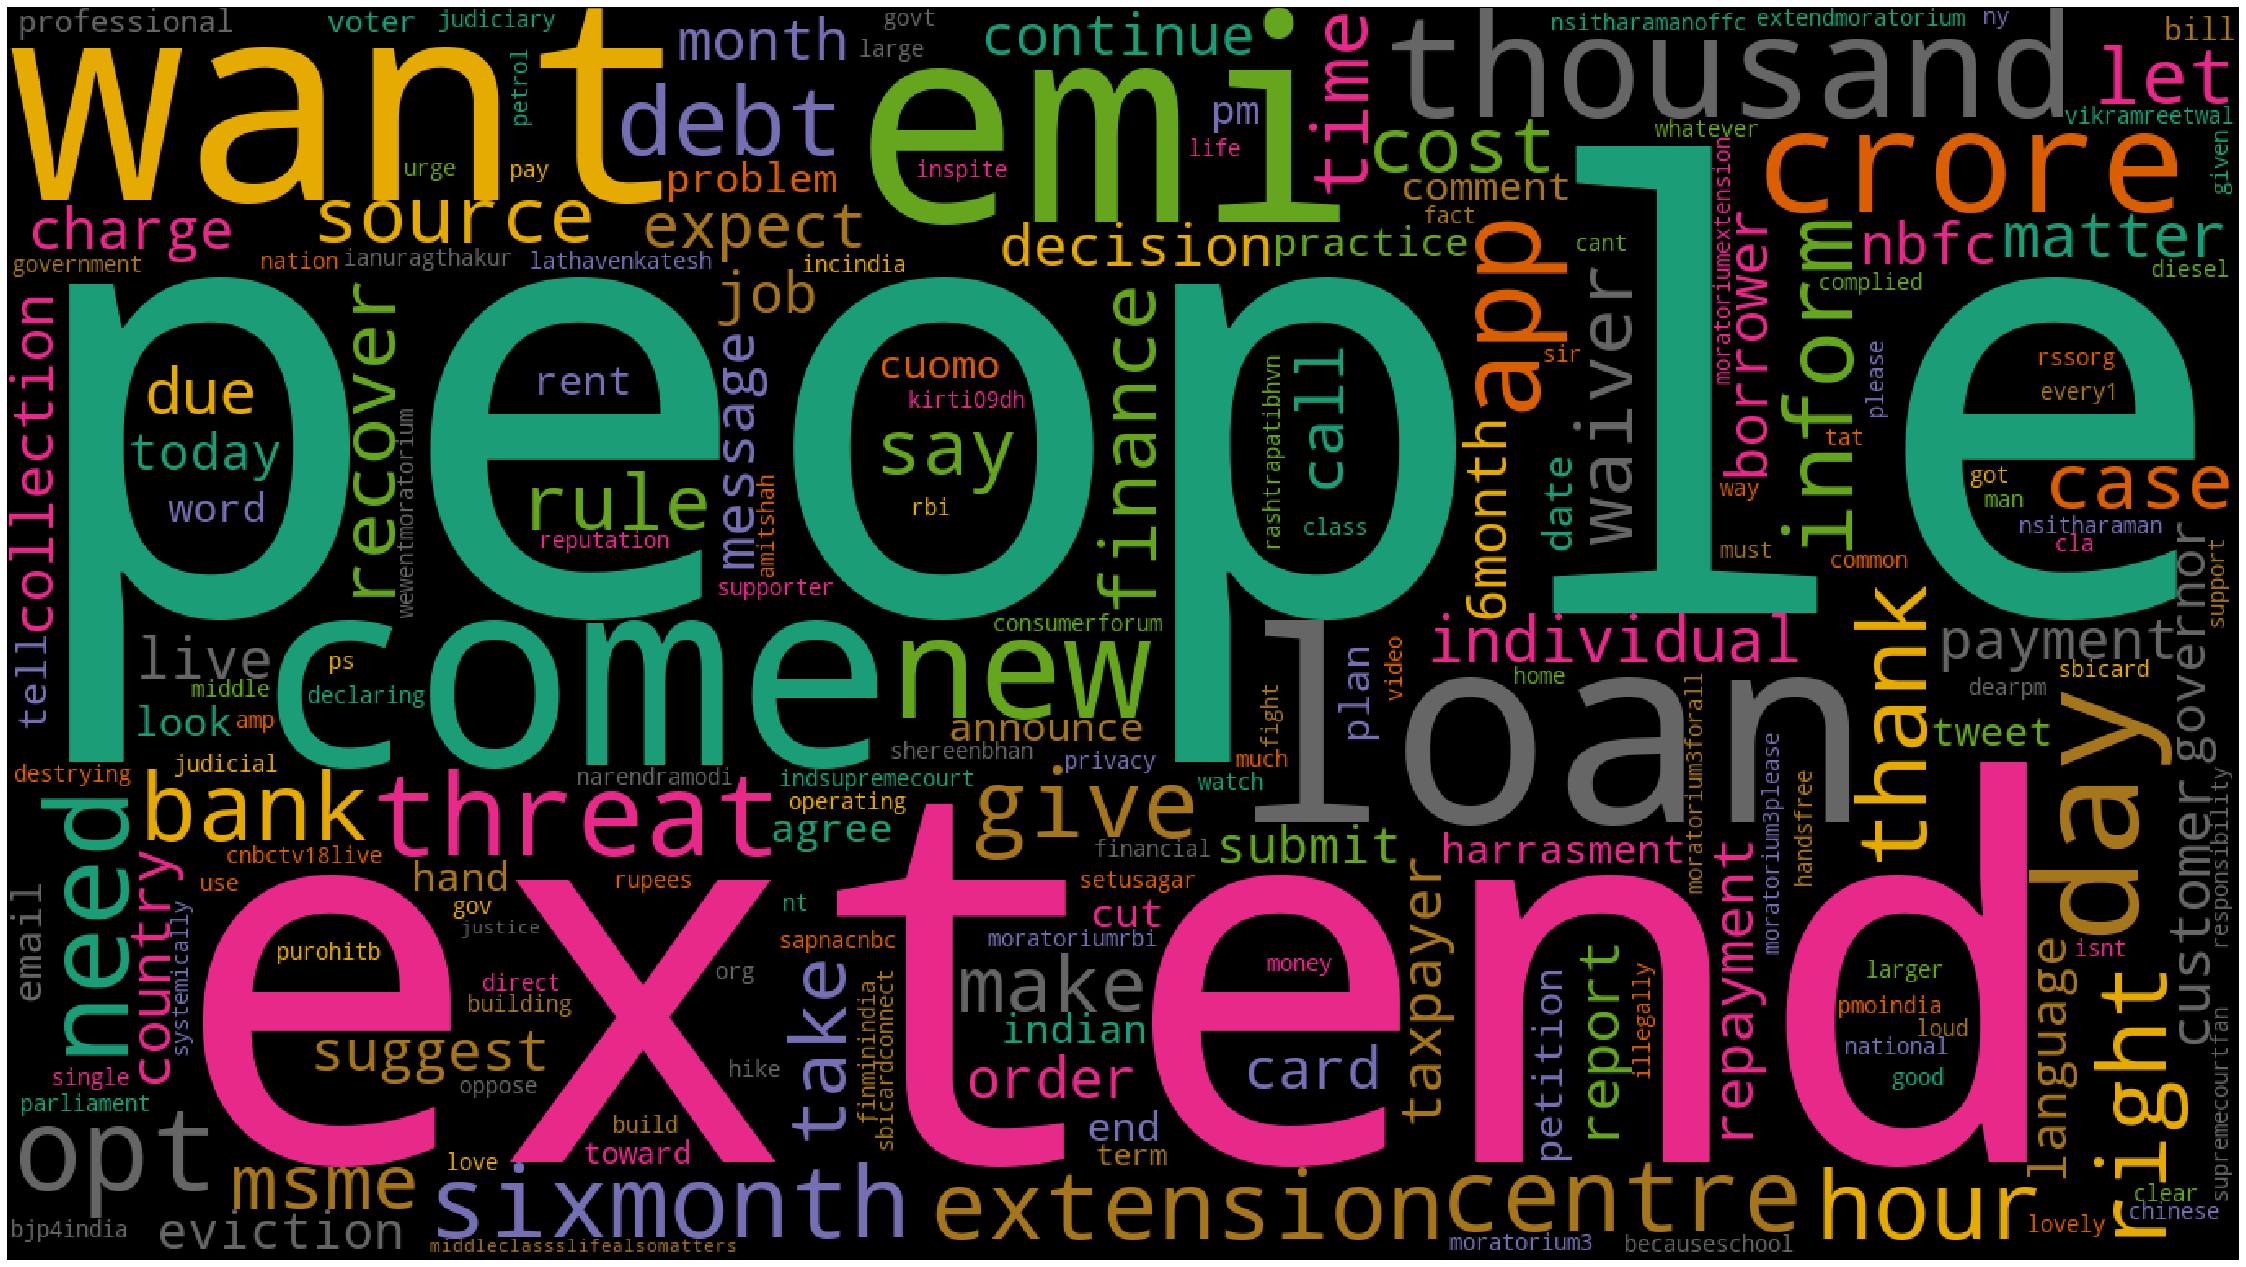

In [61]:
wordcloud = WordCloud(width = 1368, height = 768, random_state=1, background_color='black', colormap='Dark2', collocations=False, stopwords = STOPWORDS).generate(wordcloud_tweets)
# Plot
plot_cloud(wordcloud)

# Sentiment Analysis

# Getting tweets for Sentiment Analysis

In [62]:
from textblob import TextBlob

In [63]:
search_term = "#moratorium -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-09-23').items(1000)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:5]

[TextBlob("Help unemployed salaried middleclass families and MSME People are forced into poverty Extend moratorium"),
 TextBlob("Please help people in need Citizens are forced into poverty Extend moratorium extendmoratorium moratorium3"),
 TextBlob("Please help people in need Extend moratorium People are forced into poverty extendmoratorium moratorium3"),
 TextBlob("Help people in distress financial conditions Extend moratorium extendmoratorium moratorium3 moratoriumforall"),
 TextBlob("Help unemployed salaried middleclass families Extend moratorium and save lives extendmoratorium moratorium3")]

# Calculating Ploarity of Tweets 

In [64]:
# Calculate polarity of tweets
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.head()

,polarity,tweet
0,-0.300,Help unemployed salaried middleclass families ...
1,-0.300,Please help people in need Citizens are forced...
2,-0.300,Please help people in need Extend moratorium P...
7,-0.300,People are forced into poverty Extend moratori...
9,0.455,INCIndia Very good Also Fight for middle class...


# Plotting Histogram of Plority

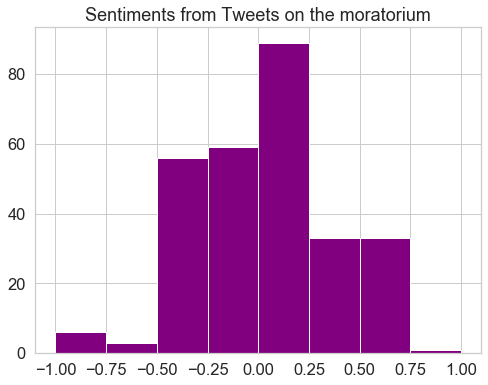

In [66]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="purple")

plt.title("Sentiments from Tweets on the moratorium")
plt.show()